In [1]:
# project: p11
# submitter: wchen394
# partner: zyu293
# hours: 2

In [2]:
import os, json, csv
from collections import namedtuple
from operator import attrgetter
import copy 
import matplotlib
import pandas as pd

In [3]:
Tweet = namedtuple('Tweet', ['tweet_id', 'username', 'num_liked', 'length'])
def get_tweets(file,folder):
    res = []
    f = open(os.path.join(folder, file), encoding="utf-8")
    reader = csv.DictReader(f)
    for row in reader:
        if row["is_retweet"] != None:
            like = 0
            if str(row["num_liked"])[-1] == 'K':
                like = int(str(row["num_liked"])[:-1]) * 1000
            elif str(row["num_liked"])[-1] == 'M':
                like = int(str(row["num_liked"])[:-1]) * 1000000
            else:
                like = int(row["num_liked"])
            t = Tweet(row["tweet_id"], row["username"], like, len(row["tweet_text"]))
            res.append(t)
    f.close()
    return res
def get_tweets_json(file,folder):
    res = []
    f = open(os.path.join(folder, file), encoding="utf-8")
    json_str = f.read()
    f.close()
    try:
        data = json.loads(json_str)
        for key in data:
                if data[key]["num_liked"] != 'unkown':
                    like = 0
                    if str(data[key]["num_liked"])[-1].lower() == 'k':
                        like = int(str(data[key]["num_liked"])[:-1]) * 1000
                    elif str(data[key]["num_liked"])[-1].lower() == 'm':
                        like = int(str(data[key]["num_liked"])[:-1]) * 1000000
                    else:
                        like = int(data[key]["num_liked"])
                    t = Tweet(key, data[key]["username"], like, len(data[key]["tweet_text"]))
                    res.append(t)
                else:
                    t = Tweet(key, data[key]["username"], 0, len(data[key]["tweet_text"]))
                    res.append(t)
    except json.decoder.JSONDecodeError:
        return res
    return res
def tweets_greater_than(textLength,directory):
    files = os.listdir(directory)
    res = []
    for file in files:
        if file[-5:] == '.json':
            cur = []
            cur = get_tweets_json(file,directory)
            res.append(cur)
        elif file[-4:] == '.csv':
            cur = []
            cur = get_tweets(file,directory)
            res.append(cur)
    ret = []
    for ele in res:
        if ele != None:
            ret.append(ele)
    filt = []
    for ele in ret:
        for tweet in ele:
            if tweet.length > textLength:
                filt.append(tweet)
    if textLength == 0:
        filted = []
        for ele in ret:
            for tweet in ele:
                filted.append(tweet)
        return filted
    return filt

In [4]:
#Return a list of all the tweet objects in full_data.
all_tweets = tweets_greater_than(0,"full_data")
def get_num_tweetLength():
    res = set()
    for tweet in all_tweets:
        res.add(tweet.length)
    return len(res)

In [5]:
#q1: How many unique tweet lengths are present in the dataset?
get_num_tweetLength()

131

In [6]:
def get_all_usernames():
    res = set()
    for tweet in all_tweets:
        res.add(tweet.username)
    return res

In [7]:
#q2: Which usernames appear in the dataset?
get_all_usernames()

{'USERID_1',
 'USERID_10',
 'USERID_2',
 'USERID_3',
 'USERID_4',
 'USERID_5',
 'USERID_6',
 'USERID_7',
 'USERID_8',
 'USERID_9'}

In [8]:
def get_prolific():
    users = list(get_all_usernames())
    res = {}
    for user in users:
        res.update({user:0})
    for tweet in all_tweets:
        res[tweet.username] += 1 
    return res

In [9]:
#q3: How prolific is each user?
get_prolific()

{'USERID_6': 51,
 'USERID_10': 45,
 'USERID_8': 31,
 'USERID_2': 47,
 'USERID_7': 55,
 'USERID_9': 44,
 'USERID_5': 46,
 'USERID_3': 39,
 'USERID_4': 35,
 'USERID_1': 52}

In [10]:
def get_each_longest_length():
    users = list(get_all_usernames())
    res = {}
    for user in users:
        res.update({user:0})
    for tweet in all_tweets:
        if res[tweet.username] < tweet.length:
            res[tweet.username] = tweet.length
    return res

In [11]:
#q4: What is the length of the longest tweet for each user?
get_each_longest_length()

{'USERID_6': 145,
 'USERID_10': 136,
 'USERID_8': 145,
 'USERID_2': 138,
 'USERID_7': 144,
 'USERID_9': 137,
 'USERID_5': 146,
 'USERID_3': 138,
 'USERID_4': 138,
 'USERID_1': 150}

In [12]:
def get_each_largest_likes():
    users = list(get_all_usernames())
    res = {}
    for user in users:
        res.update({user:0})
    for tweet in all_tweets:
        if res[tweet.username] < tweet.num_liked:
            res[tweet.username] = tweet.num_liked
    return res

In [13]:
#q5: What is the largest number of likes received on a tweet for each user?
get_each_largest_likes()

{'USERID_6': 9149,
 'USERID_10': 9936,
 'USERID_8': 915000,
 'USERID_2': 869000000,
 'USERID_7': 9851,
 'USERID_9': 9728,
 'USERID_5': 9608,
 'USERID_3': 9678,
 'USERID_4': 9618,
 'USERID_1': 9393}

In [14]:
def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

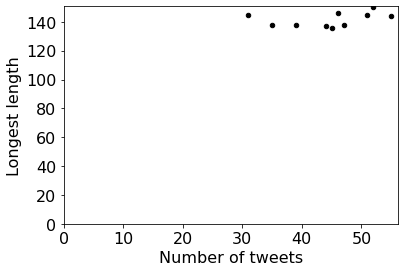

In [15]:
#q6: What is the relationship between the number of tweets by a user and the length of their longest tweet?
num_tweet = get_prolific()
len_tweet = get_each_longest_length()
scatter(num_tweet, len_tweet, xlabel="Number of tweets", ylabel="Longest length")

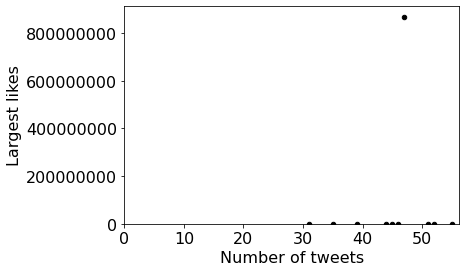

In [16]:
#q7: What is the relationship between the number of tweets and the largest number of likes?
largest_like = get_each_largest_likes()
scatter(num_tweet, largest_like, xlabel="Number of tweets", ylabel="Largest likes")

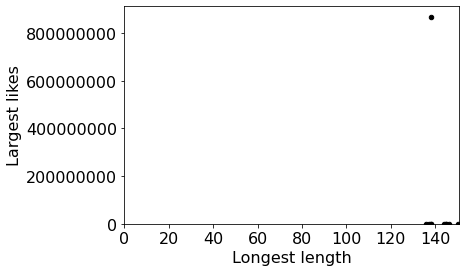

In [17]:
#q8: What is the relationship between the length of their longest tweet and the largest number of likes?
scatter(len_tweet, largest_like, xlabel="Longest length", ylabel="Largest likes")

In [18]:
def get_outlier():
    res = ''
    max_num = 0
    for user in largest_like:
        if largest_like[user] > max_num:
            max_num = largest_like[user]
            res = user
    return res

In [19]:
#q9: What is the username of the user represented by the outlier in the last two plots?
get_outlier()

'USERID_2'

In [20]:
def get_outlier_user_tweet():
    outlier = get_outlier()
    res = []
    for tweet in all_tweets:
        if tweet.username == outlier:
            res.append(tweet)
    res = sorted(res, key=attrgetter('num_liked'))
    res = res[::-1]
    return res

In [21]:
#q10: What are the tweets made by that outlier user?
get_outlier_user_tweet()

[Tweet(tweet_id='1467894593', username='USERID_2', num_liked=869000000, length=136),
 Tweet(tweet_id='1467875163', username='USERID_2', num_liked=9891, length=69),
 Tweet(tweet_id='1467862806', username='USERID_2', num_liked=9465, length=68),
 Tweet(tweet_id='1467907751', username='USERID_2', num_liked=9048, length=110),
 Tweet(tweet_id='1467928764', username='USERID_2', num_liked=9026, length=41),
 Tweet(tweet_id='1467943007', username='USERID_2', num_liked=9000, length=130),
 Tweet(tweet_id='1467918682', username='USERID_2', num_liked=8884, length=102),
 Tweet(tweet_id='1467935121', username='USERID_2', num_liked=8740, length=37),
 Tweet(tweet_id='1467947913', username='USERID_2', num_liked=8578, length=36),
 Tweet(tweet_id='1467892667', username='USERID_2', num_liked=8270, length=20),
 Tweet(tweet_id='1467897316', username='USERID_2', num_liked=7890, length=64),
 Tweet(tweet_id='1467854917', username='USERID_2', num_liked=7741, length=30),
 Tweet(tweet_id='1467961106', username='USE

In [22]:
def get_avg_like():
    user = get_outlier_user_tweet()
    user.pop(0)
    like = 0
    for ele in user:
        like += ele.num_liked
    return round(like/len(user),2)

In [23]:
#q11: After excluding the outlier tweet of this outlier user (found in q10), what is the average of the remaining num_liked values for this user?
get_avg_like()

5003.57

In [24]:
def get_new_usernames(time):
    res = set()
    tweets = exclude_outlier(time)
    for tweet in tweets:
        res.add(tweet.username)
    return res
def get_each_largest_likes_new(time):
    users = list(get_new_usernames(time))
    tweets = exclude_outlier(time)
    res = {}
    for user in users:
        res.update({user:0})
    for tweet in tweets:
        if res[tweet.username] < tweet.num_liked:
            res[tweet.username] = tweet.num_liked
    return res
def exclude_outlier(time):
    replicate = all_tweets
    replicate= sorted(replicate, key=attrgetter('num_liked'))
    replicate = replicate[::-1]
    for i in range(time):
        replicate.pop(0)
    return replicate
def get_prolific_new(time):
    users = list(get_new_usernames(time))
    tweets = exclude_outlier(time)
    res = {}
    for user in users:
        res.update({user:0})
    for tweet in tweets:
        res[tweet.username] += 1 
    return res


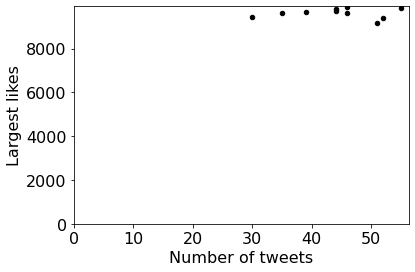

In [25]:
#q12: If we exclude the top 3 most-liked tweets (among all tweets), what is the relationship between the number of tweets and the largest number of likes?
largest_like = get_each_largest_likes_new(3)
num_tweet = get_prolific_new(3)
scatter(num_tweet, largest_like, xlabel="Number of tweets", ylabel="Largest likes")

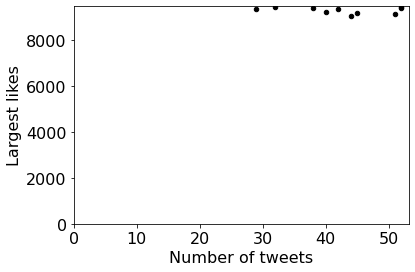

In [26]:
#q13: If we exclude the 20 most-liked tweets (among all tweets), what is the relationship between the number of tweets and the largest number of likes?
largest_like = get_each_largest_likes_new(20)
num_tweet = get_prolific_new(20)
scatter(num_tweet, largest_like, xlabel="Number of tweets", ylabel="Largest likes")

In [27]:
def get_files(dire, res):
    if os.listdir(dire) == []:
     #   print(1)
        return res
    #print(2)
    for ele in os.listdir(dire):
        #print(ele)
        if os.path.isfile(os.path.join(dire,ele)):
        #    print(4)
            res.append(os.path.join(dire,ele))
        if os.path.isdir(os.path.join(dire,ele)):
       #     print(4)
            res = get_files(os.path.join(dire,ele), res)
      #  print(ele)
    #print(5)
    return sorted(res)

In [28]:
#q14: What are the files in the rb directory of play directory?

# os.listdir
# os.path.join
# os.path.isfile
# os.path.isdir
res= []
get_files(os.path.join("play","rb"), res)
#os.listdir(os.path.join("play","rb"))

['play\\rb\\ppt.ppt', 'play\\rb\\rb9\\12.xls', 'play\\rb\\rb9\\89.csv']

In [29]:
#q15: What are the files in the qwe directory of ls directory of the play directory?
res= []
get_files(os.path.join("play","ls","qwe"), res)

['play\\ls\\qwe\\iuqwe.json', 'play\\ls\\qwe\\usun.pdf']

In [30]:
#q16: What are the files in the play directory?
res= []
get_files(os.path.join("play"), res)

['play\\ls\\lu.txt',
 'play\\ls\\mf.py',
 'play\\ls\\qwe\\iuqwe.json',
 'play\\ls\\qwe\\usun.pdf',
 'play\\ou\\a',
 'play\\ou\\b',
 'play\\ou\\quap\\aoq\\aqnsa',
 'play\\ou\\quap\\aoq\\qsonj',
 'play\\ou\\quap\\qonxu.txt',
 'play\\ou\\quap\\uikwe',
 'play\\ou\\v',
 'play\\rb\\ppt.ppt',
 'play\\rb\\rb9\\12.xls',
 'play\\rb\\rb9\\89.csv']

In [31]:
#q17: What are the files in the others directory of the recursive directory?
res= []
get_files(os.path.join("recursive","others"), res)

['recursive\\others\\USERID_10.json',
 'recursive\\others\\USERID_5.json',
 'recursive\\others\\USERID_6.json',
 'recursive\\others\\USERID_7.json',
 'recursive\\others\\USERID_8.json',
 'recursive\\others\\USERID_9.json']

In [32]:
#q18: What are the files in the recursive directory?
res= []
get_files(os.path.join("recursive"), res)

['recursive\\USERID_1\\tweets.json',
 'recursive\\USERID_2\\tweets.json',
 'recursive\\USERID_3\\tweets.json',
 'recursive\\USERID_4\\1.csv',
 'recursive\\USERID_4\\1.json',
 'recursive\\USERID_4\\2.csv',
 'recursive\\USERID_4\\2.json',
 'recursive\\USERID_4\\false\\tweets.json',
 'recursive\\USERID_4\\true\\tweets.json',
 'recursive\\others\\USERID_10.json',
 'recursive\\others\\USERID_5.json',
 'recursive\\others\\USERID_6.json',
 'recursive\\others\\USERID_7.json',
 'recursive\\others\\USERID_8.json',
 'recursive\\others\\USERID_9.json']

In [33]:
def get_num_tweets():
    res= []
    files = get_files(os.path.join("recursive","USERID_4"), res)
    res = 0
    for file in files:
        f = open(os.path.join(file), encoding="utf-8")
        reader = csv.DictReader(f)
        if file[-4:] == '.csv':
            for row in reader:
                res += 1
        if file[-5:] == '.json':
            json_str = f.read()
            f.close()
            data = json.loads(json_str)
            for key in data:
                res += 1
        f.close()
    return res

In [34]:
#q19: How many tweets are in the files in the USERID_4 directory of the recursive directory?
get_num_tweets()

37

In [35]:
def get_num_tweets_20():
    res= []
    files = get_files(os.path.join("recursive"), res)
    res = 0
    for file in files:
        f = open(os.path.join(file), encoding="utf-8")
        reader = csv.DictReader(f)
        if file[-4:] == '.csv':
            for row in reader:
                res += 1
        if file[-5:] == '.json':
            json_str = f.read()
            f.close()
            data = json.loads(json_str)
            for key in data:
                res += 1
        f.close()
    return res

In [36]:
#q20: How many tweets are in the files in the recursive directory?
get_num_tweets_20()

220